In [1]:
%pylab inline
import glob
import os
from tirftools import get_tdms_images
from natsort import natsorted
import matplotlib.animation as animation
from tirftools import FitGauss2D
import trackpy as tp
from matplotlib_scalebar.scalebar import ScaleBar
from tirftools import get_tdms_images,FitGauss1D,Gaussian1D, moments1D
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


C:\Users\pkgroup\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes', 'e', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Populating the interactive namespace from numpy and matplotlib


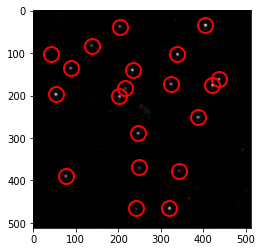

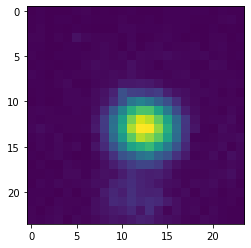

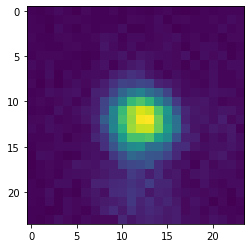

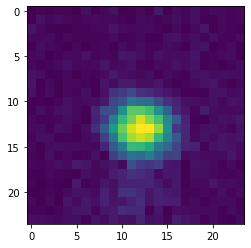

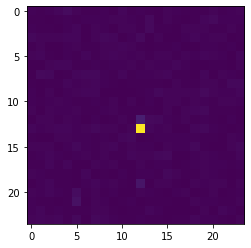

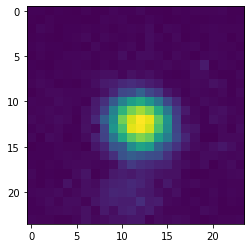

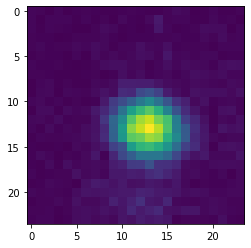

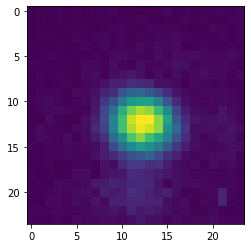

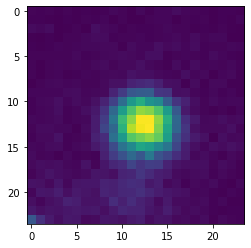

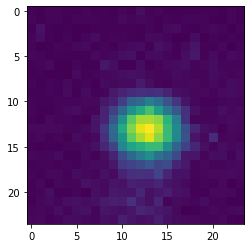

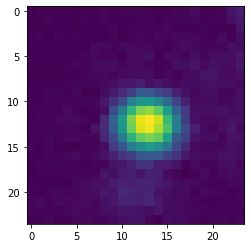

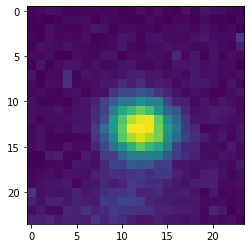

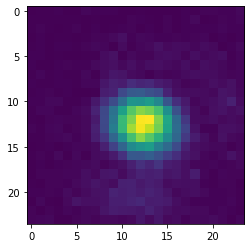

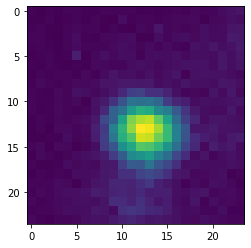

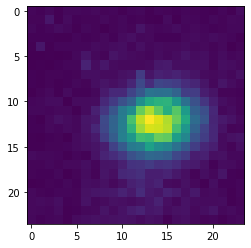

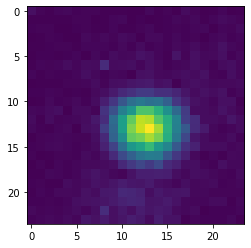

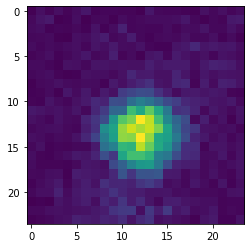

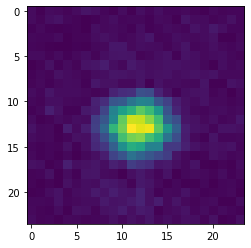

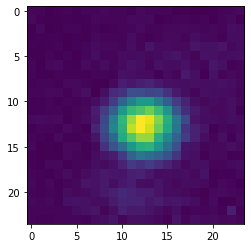

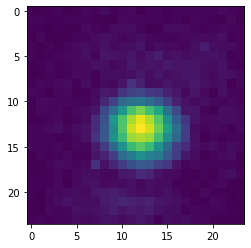

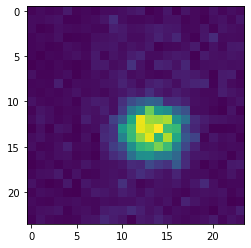

In [50]:
%pylab inline
import glob
import os
from tirftools import get_tdms_images
from natsort import natsorted
import matplotlib.animation as animation
from tirftools import FitGauss2D
import trackpy as tp
from matplotlib_scalebar.scalebar import ScaleBar

data_directory = r'Q:\Val\Jan\26\exp 1'
tdms_files = glob.glob(os.path.join(data_directory,'*.tdms'), recursive=True)
sorted_tdms_files = natsorted(tdms_files)

rng = 12
x_shift = 7.1447
y_shift = 6.0106
bkg = []
amp = []
sig = []
ns1 = []

for i in range(1):
    i = 3
    image520 = np.mean(get_tdms_images(sorted_tdms_files[2*i]), axis=0)
    image550 = np.mean(get_tdms_images(sorted_tdms_files[2*i+1]), axis=0)
    fig, axs = plt.subplots()
    joe = axs.imshow(image520, 'binary_r')
    f = tp.locate(image520, 5, minmass=9, noise_size= 0.5, separation = 15)    #0.3 and 0.43 for exp 1/ 0.35 and 0.40 for exp 2
    g = tp.locate(image550, 5, minmass=6, noise_size= 0.43, separation = 15)
    e = tp.annotate(g, image550)
    #fig.savefig(r'Q:\Val\Jan\26\exp 1 trackpy\520 minmass = 9\image%s.pdf' %i)
    #fig, ax = plt.subplots()
    #ax.hist(g['mass'], bins=20)
    #print(len(f['x']))
    
    k = 0
    for x,y in zip(g['x'],g['y']):
        slice_x = slice(int(x) - rng, int(x) + rng)
        slice_y = slice(int(y) - rng, int(y) + rng)
        #params = FitGauss2D(image520[(slice_x,slice_y)])
        meme = image550[slice_y, slice_x]     
        if k == k:
            fig , axs = subplots()
            axs.imshow(meme)
            fig.savefig(r'Q:\Val\Jan\26\exp 1 images\550 10E-4\image%s.pdf' %k)
        k = k +1
        #print(x,y)

#     h = 0
#     for x,y in zip(f['x'],f['y']):
#         slice_x = slice(int(x) - rng, int(x) + rng)
#         slice_y = slice(int(y) - rng,int(y) + rng)
#         #params = FitGauss2D(image550[(slice_y,slice_x)])
#         #ns1.append(params['x_center'])
#         #bkg.append(params['bkg'])
#         #avg_sigma = (params['x_sigma']+params['y_sigma'])/2
#         #sig.append(avg_sigma)
#         #amp.append(params['amplitude'])
#         #fig1 , axs = subplots()
#         image1 = image550[slice_y, slice_x]
#         #axs.plot(image1)
#         axs.imshow(image1)
#         #fig1.savefig(r'Q:\Val\Jan\26\exp 1 event 9 qdots + 1 bug\just images\image%s.pdf' %h)
#         h = h+1
#         #print(x,y)


                          
        
    #fig.savefig(r'Q:\Val\Jan\26\test\image%s.pdf' %i)

In [55]:
for i in range(len(ns1)):
    if 5 < ns1[i] < 20:
        print(ns1[i],amp[i], bkg[i], sig[i])

13.04155013736031 13.976800545271994 1.3577719421772658 2.3112517965730195
12.463529496019701 20.727604189706394 1.5795293196285294 2.2543038983816936
13.042849838253408 15.30167991059544 1.7591571107300503 2.2720692824056683
13.17406456965254 17.489803805347155 1.6375700426306192 2.375869541058875
12.298948814341536 15.693528228208454 1.4353063549186071 2.274351023557946
13.067886756983734 11.598795793216604 1.3975269262923202 2.227244866594798
12.112395153735484 13.166568469394893 1.3655599632529754 2.2530886076853736
12.711688621630971 10.94749325001059 1.3600983104485451 2.3274338904802168
12.728388818273151 3.799187377744126 1.2699525120514268 2.362175676882856
12.325478308229261 6.9374383697454745 1.3193792809384972 2.366934626706061
12.868396506973975 10.744325267544408 1.3539544203679714 2.341240417362159
12.243987676489297 8.001488219552755 1.3546990523013958 2.2789160034761458
12.70505303778752 29.069173192368435 1.852385760159159 2.493016110733346
12.863320308167374 18.70123

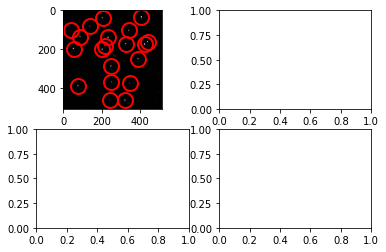

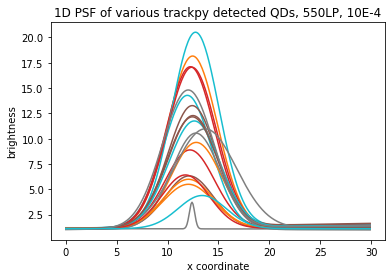

In [54]:
data_directory = r'Q:\Val\Jan\26\exp 1'
tdms_files = glob.glob(os.path.join(data_directory,'*.tdms'), recursive=True)
sorted_tdms_files = natsorted(tdms_files)

rng = 12
x_shift = 7.1447
y_shift = 6.0106
bkg = []
amp = []
sig = []
x_coor = []


fig, axes = plt.subplots(2,2)
fig2, gauss_plot = plt.subplots()

for i in range(1):
    i = 3
    image520 = np.mean(get_tdms_images(sorted_tdms_files[2*i]), axis=0)
    image550 = np.mean(get_tdms_images(sorted_tdms_files[2*i+1]), axis=0)
    f = tp.locate(image520, 5, minmass=9, noise_size= 0.5, separation = 15)    #0.3 and 0.43 for exp 1/ 0.35 and 0.40 for exp 2
    g = tp.locate(image550, 5, minmass=6, noise_size= 0.43, separation = 15)
    e = tp.annotate(g, image550,ax=axes[0][0])
    

    h = 0
    for x,y in zip(g['x'],g['y']):
        slice_x = slice(max(0,int(x) - rng), min(512,int(x) + rng))
        slice_y = slice(max(0,int(y) - rng),min(512,int(y) + rng))
        image1 = image550[slice_y, slice_x]
        #print(slice_x, slice_y)
        #(max_x_pos, max_y_pos) = np.unravel_index(np.argmax(image1),(25,25))
        max_x_pos = 12
        gauss_plot.plot(image1[0][0])
        
        initial = moments1D(image1[max_x_pos,:]) # works
        Data = np.arange(0,len(image1[max_x_pos,:]),1) # works
        fitted_values = curve_fit(Gaussian1D,Data,image1[max_x_pos,:],p0=initial)      
        x = np.arange(0,30,0.1)
        values = apply_along_axis(Gaussian1D,0,x,*fitted_values[0])
        
        gauss_plot.plot(x,values)
        xlabel('x coordinate')
        ylabel('brightness')
        title('1D PSF of various trackpy detected QDs, 550LP, 10E-4')
        #fig2.savefig(r'Q:\Val\Jan\26\PSF test.pdf' )
        #print(fitted_values)
        
        x_coor.append(fitted_values[0][1])
        bkg.append(fitted_values[0][3])
        sig.append(fitted_values[0][2])
        amp.append(fitted_values[0][0])
        
        #fig2.savefig(r'Q:\Val\Jan\26\PSF of exp 1 event 9%s.pdf' %h)
        h = h+1
        #print(x,y)
#fig2.savefig(r'Q:\Val\Jan\26\PSF test.pdf' )

                          
        
    #fig.savefig(r'Q:\Val\Jan\26\test\image%s.pdf' %i)

In [48]:
for i in range(len(bkg)):
    print(x_coor[i], amp[i], sig[i], bkg[i])

12.14346494264738 21.554078479859758 2.3966691793281267 1.1401336437613012
13.14367884736888 1.0041673324286544 -0.3795917338917494 1.0747770106125432
12.031864614107779 10.061227044566492 2.4264984962850797 0.9894422338085036
12.484406029448014 13.113444100048211 2.411595833351773 1.0096277484492808
12.287013658782781 10.175498477958358 2.5219265113205114 0.9955056137865765
12.798160547717513 3.0737653586699807 2.3325402790418064 1.12585480374851
12.287569337796965 10.739579595306427 2.2971486468647404 1.1133237809121188


In [55]:
snr = mean(amp)/mean(bkg)
print(mean(amp), mean(bkg), mean(sig), snr)

10.02036144007711 1.1173853219477 2.3547717735493383 8.967686654958692
